In [90]:
"""
Problem 1
Linear function
"""

import numpy as np

x = np.arange(-50, 50.1, 0.1, dtype=float)
y = 1/2*x+1

print('x:')
print(x)
print('y:')
print(y)

x:
[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
y:
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


In [91]:
"""
Problem 2
Array combination
"""

M = np.stack((x, y), axis=1)
print('M:')
print(M)
print(f'M shape: {M.shape}')

M:
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
M shape: (1001, 2)


In [92]:
"""
Problem 3
Find the gradient
"""

delta_y = y[1:] - y[:-1]
delta_x = x[1:] - x[:-1]

gradient = np.round(delta_y/delta_x, 2)

print(gradient)
print(f'gradient shape: {gradient.shape}')

# Gradient can also be calculated by taking the derivative of y
# y = 1/2x + 1
# dy/dx = 1/2


[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

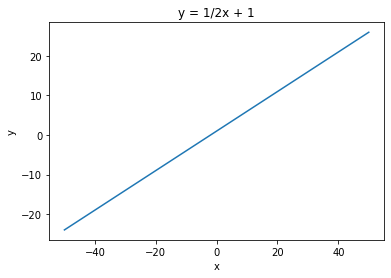

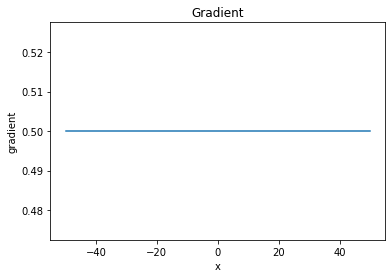

In [93]:
"""
Problem 4
Draw a graph
"""
import matplotlib.pyplot as plt

%matplotlib inline
plt.title("y = 1/2x + 1")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(M[:,0], M[:,1])
plt.show()

%matplotlib inline
plt.title("Gradient")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(x[1:], gradient)
plt.show()

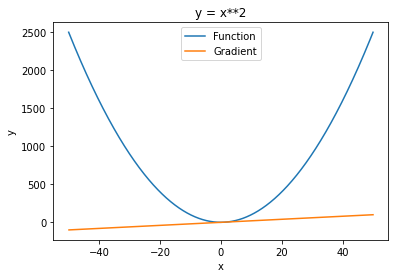

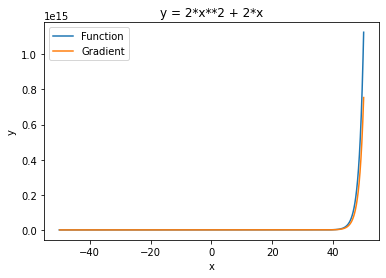

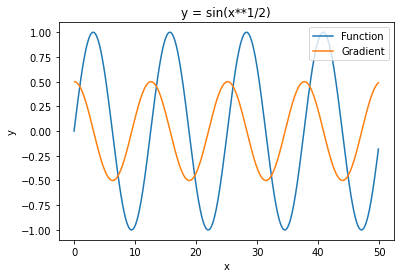

In [94]:
"""
Problem 5
Python functionalization
"""

def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    Calculate the gradient using the amount of change.
    Parameters
    ----------------
    function : function
      The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
    x_range : tuple
      Specify the range in the same way as the argument of np.arange ().
    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      A combination of x and y. n depends on x_range.
    gradient : ndarray, shape(n-1,)
      Function gradient. One factor is reduced to make a difference
    """
    start, stop, step = x_range
    x = np.arange(start, stop, step, dtype=float)
    y = function(x)
    
    array_xy = np.stack((x, y), axis=1)
    
    delta_y = y[1:] - y[:-1]
    delta_x = x[1:] - x[:-1]

    gradient = delta_y/delta_x

    return array_xy, gradient

def function1(array_x):
    return array_x**2
    
def function2(array_x):
    return 2 * array_x**2 + 2**array_x

def function3(array_x):
    return np.sin(array_x**1/2)


array_xy1, gradient1 = compute_gradient(function1)
array_xy2, gradient2 = compute_gradient(function2)
array_xy3, gradient3 = compute_gradient(function3, (0.0, 50.0, 0.1))

%matplotlib inline
plt.title("y = x**2")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy1[:,0], array_xy1[:,1], label="Function")
plt.plot(array_xy2[:,0][1:], gradient1, label="Gradient")
plt.legend()
plt.show()

%matplotlib inline
plt.title("y = 2*x**2 + 2*x")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy2[:,0], array_xy2[:,1], label="Function")
plt.plot(array_xy2[:,0][1:], gradient2, label="Gradient")
plt.legend()
plt.show()

%matplotlib inline
plt.title("y = sin(x**1/2)")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy3[:,0], array_xy3[:,1], label="Function")
plt.plot(array_xy3[:,0][1:], gradient3, label="Gradient")
plt.legend()
plt.show()

In [95]:
"""
Problem 6
Find the minimum value
"""

print("Min of function: x**2: ", np.min(array_xy1[:,1]))
print(f"Slope before taking minimum: {gradient1[np.argmin(array_xy1[:,1])-1]} and after minimum value: {gradient1[np.argmin(array_xy1[:,1])+1]}")
print()

print("Min of function: 2*x**2 + 2*x: ", np.min(array_xy2[:,1]))
print(f"Slope before taking minimum: {gradient2[np.argmin(array_xy2[:,1])-1]} and after minimum value: {gradient2[np.argmin(array_xy2[:,1])+1]}")
print()

print("Min of function: sin(x**1/2): ", np.min(array_xy3[:,1]))
print(f"Slope before taking minimum: {gradient3[np.argmin(array_xy3[:,1])-1]} and after minimum value: {gradient3[np.argmin(array_xy3[:,1])+1]}")

Min of function: x**2:  5.048709793414476e-25
Slope before taking minimum: -0.09999999999858034 and after minimum value: 0.30000000000142535

Min of function: 2*x**2 + 2*x:  0.9505505632959851
Slope before taking minimum: -0.4170183305979998 and after minimum value: 0.4696700846350943

Min of function: sin(x**1/2):  -0.9999902065507035
Slope before taking minimum: -0.010285346568865924 and after minimum value: 0.039666982720562564
